In [142]:
import warnings

# Suppress the Deprecation Warnings.
warnings.filterwarnings('ignore', category=DeprecationWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from scipy.stats import mode, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [143]:
df = pd.read_csv('resources/train.csv')
test_df = pd.read_csv('resources/test.csv')

In [144]:
# Get a quick overview of the data.
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [145]:
# Identify the columns with missing values.
missing = df.isnull().sum()
missing = missing[missing > 0]

pd.set_option('display.max_rows', None)
display(missing)
pd.set_option('display.max_rows', 10)





# Identify the columns with missing values.
missing = test_df.isnull().sum()
missing = missing[missing > 0]

pd.set_option('display.max_rows', None)
display(missing)
pd.set_option('display.max_rows', 10)

Number_of_Windows         1333
Furnishing                 828
Frequency_of_Powercuts    1109
Crime_Rate                 629
Dust_and_Noise             999
dtype: int64

Number_of_Windows         321
Furnishing                214
Frequency_of_Powercuts    274
Crime_Rate                158
Dust_and_Noise            220
dtype: int64

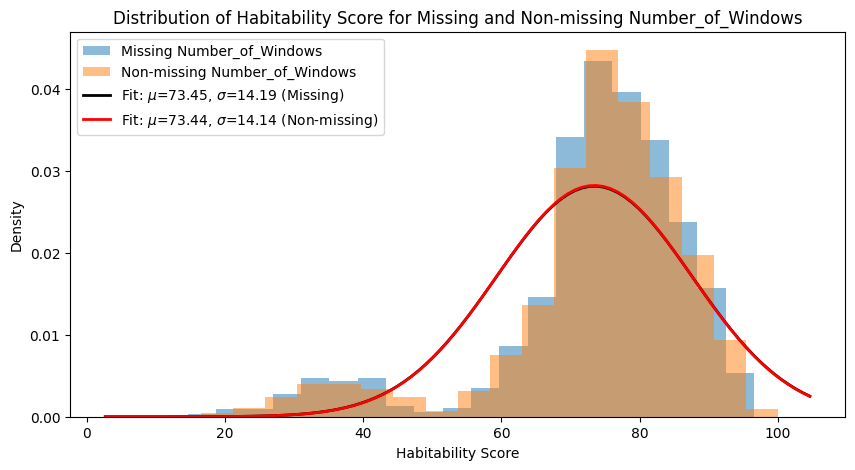

In [146]:
# Extract data for missing and non-missing values of Number_of_Windows
missing_values = df[df['Number_of_Windows'].isnull()]['Habitability_score']
non_missing_values = df[df['Number_of_Windows'].notnull()]['Habitability_score']

# Fit Gaussian distributions to the data
mu_missing, std_missing = norm.fit(missing_values)
mu_non_missing, std_non_missing = norm.fit(non_missing_values)

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(missing_values, bins=20, density=True, alpha=0.5, label='Missing Number_of_Windows')
plt.hist(non_missing_values, bins=20, density=True, alpha=0.5, label='Non-missing Number_of_Windows')

# Plot standard normal curves
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_missing = norm.pdf(x, mu_missing, std_missing)
p_non_missing = norm.pdf(x, mu_non_missing, std_non_missing)
plt.plot(x, p_missing, 'k', linewidth=2, label=f'Fit: $\mu$={mu_missing:.2f}, $\sigma$={std_missing:.2f} (Missing)')
plt.plot(x, p_non_missing, 'r', linewidth=2, label=f'Fit: $\mu$={mu_non_missing:.2f}, $\sigma$={std_non_missing:.2f} (Non-missing)')

plt.xlabel('Habitability Score')
plt.ylabel('Density')
plt.title('Distribution of Habitability Score for Missing and Non-missing Number_of_Windows')
plt.legend()
plt.show()

In [147]:
# Separate the dataset into two subsets: one with missing values and the other without
df_missing = df[df['Number_of_Windows'].isnull()]
df_non_missing = df.dropna(subset=['Number_of_Windows'])

# Split the non-missing subset into features (X) and target variable (y)
X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
y_train = df_non_missing['Number_of_Windows']

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Predict the missing values using the trained model
X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
predicted_values = knn_model.predict(X_missing)

# Fill in the missing values in the original DataFrame
df.loc[df['Number_of_Windows'].isnull(), 'Number_of_Windows'] = predicted_values





# # Separate the dataset into two subsets: one with missing values and the other without
# df_missing = test_df[test_df['Number_of_Windows'].isnull()]
# df_non_missing = df.dropna(subset=['Number_of_Windows'])

# # Split the non-missing subset into features (X) and target variable (y)
# X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# y_train = df_non_missing['Number_of_Windows']

# # Train a KNN model
# knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
# knn_model.fit(X_train, y_train)

# # Predict the missing values using the trained model
# X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# predicted_values = knn_model.predict(X_missing)

# # Fill in the missing values in the original DataFrame
# df.loc[df['Number_of_Windows'].isnull(), 'Number_of_Windows'] = predicted_values

In [148]:
display(df['Furnishing'].value_counts())
df['Furnishing'] = df['Furnishing'].map({'Unfurnished': 0, 'Semi_Furnished': 1, 'Fully Furnished': 2})
# test_df['Furnishing'] = test_df['Furnishing'].map({'Unfurnished': 0, 'Semi_Furnished': 1, 'Fully Furnished': 2})

Furnishing
Semi_Furnished     16314
Unfurnished         8279
Fully Furnished     6178
Name: count, dtype: int64

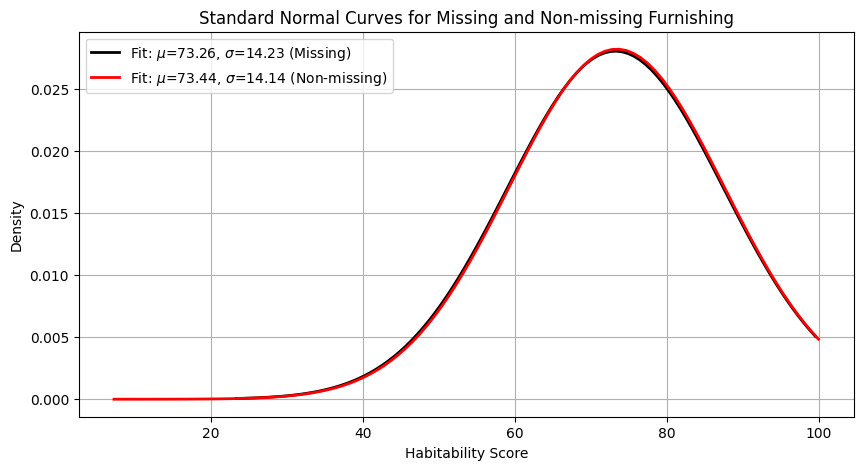

In [149]:
# Extract data for missing and non-missing values of Furnishing
missing_values = df[df['Furnishing'].isnull()]['Habitability_score']
non_missing_values = df[df['Furnishing'].notnull()]['Habitability_score']

# Fit Gaussian distributions to the data
mu_missing, std_missing = norm.fit(missing_values)
mu_non_missing, std_non_missing = norm.fit(non_missing_values)

# Plot standard normal curves
plt.figure(figsize=(10, 5))

# Plot the standard normal curves for missing values
x = np.linspace(missing_values.min(), missing_values.max(), 100)
p_missing = norm.pdf(x, mu_missing, std_missing)
plt.plot(x, p_missing, 'k', linewidth=2, label=f'Fit: $\mu$={mu_missing:.2f}, $\sigma$={std_missing:.2f} (Missing)')

# Plot the standard normal curves for non-missing values
x = np.linspace(non_missing_values.min(), non_missing_values.max(), 100)
p_non_missing = norm.pdf(x, mu_non_missing, std_non_missing)
plt.plot(x, p_non_missing, 'r', linewidth=2, label=f'Fit: $\mu$={mu_non_missing:.2f}, $\sigma$={std_non_missing:.2f} (Non-missing)')

plt.xlabel('Habitability Score')
plt.ylabel('Density')
plt.title('Standard Normal Curves for Missing and Non-missing Furnishing')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
# Separate the dataset into two subsets: one with missing values and the other without
df_missing = df[df['Furnishing'].isnull()]
df_non_missing = df.dropna(subset=['Furnishing'])

# Split the non-missing subset into features (X) and target variable (y)
X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
y_train = df_non_missing['Furnishing']

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Find the k-nearest neighbors for each missing value
X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# Predict the missing values using mode of the nearest neighbors
predicted_values = []
for neighbors in nearest_neighbors:
    mode_value, _ = mode(y_train.iloc[neighbors])
    if not np.isnan(mode_value):  # Check if mode_value is not NaN
        predicted_values.append(mode_value)
    else:
        # Handle case where mode is NaN (e.g., all neighbors have different values)
        # You can implement custom logic here, such as selecting a random value
        predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# Fill in the missing values in the original DataFrame
df.loc[df['Furnishing'].isnull(), 'Furnishing'] = predicted_values





# # Separate the dataset into two subsets: one with missing values and the other without
# df_missing = test_df[test_df['Furnishing'].isnull()]
# df_non_missing = test_df.dropna(subset=['Furnishing'])

# # Split the non-missing subset into features (X) and target variable (y)
# X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# y_train = df_non_missing['Furnishing']

# # Train a KNN model
# knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
# knn_model.fit(X_train, y_train)

# # Find the k-nearest neighbors for each missing value
# X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# # Predict the missing values using mode of the nearest neighbors
# predicted_values = []
# for neighbors in nearest_neighbors:
#     mode_value, _ = mode(y_train.iloc[neighbors])
#     if not np.isnan(mode_value):  # Check if mode_value is not NaN
#         predicted_values.append(mode_value)
#     else:
#         # Handle case where mode is NaN (e.g., all neighbors have different values)
#         # You can implement custom logic here, such as selecting a random value
#         predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# # Fill in the missing values in the original DataFrame
# df.loc[df['Furnishing'].isnull(), 'Furnishing'] = predicted_values

In [151]:
display(df['Furnishing'].value_counts())

Furnishing
1.0    16850
0.0     8503
2.0     6246
Name: count, dtype: int64

In [152]:
display(df['Frequency_of_Powercuts'].value_counts())

Frequency_of_Powercuts
0.0    19560
1.0     7998
2.0     1955
3.0      977
Name: count, dtype: int64

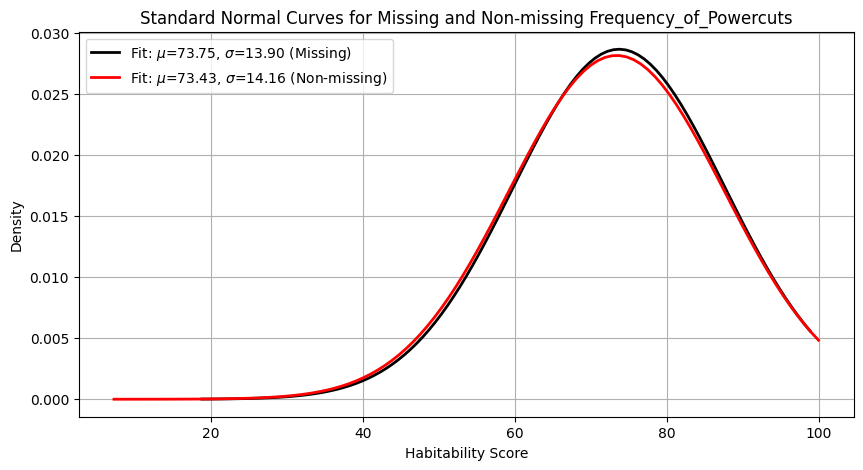

In [153]:
# Extract data for missing and non-missing values of Furnishing
missing_values = df[df['Frequency_of_Powercuts'].isnull()]['Habitability_score']
non_missing_values = df[df['Frequency_of_Powercuts'].notnull()]['Habitability_score']

# Fit Gaussian distributions to the data
mu_missing, std_missing = norm.fit(missing_values)
mu_non_missing, std_non_missing = norm.fit(non_missing_values)

# Plot standard normal curves
plt.figure(figsize=(10, 5))

# Plot the standard normal curves for missing values
x = np.linspace(missing_values.min(), missing_values.max(), 100)
p_missing = norm.pdf(x, mu_missing, std_missing)
plt.plot(x, p_missing, 'k', linewidth=2, label=f'Fit: $\mu$={mu_missing:.2f}, $\sigma$={std_missing:.2f} (Missing)')

# Plot the standard normal curves for non-missing values
x = np.linspace(non_missing_values.min(), non_missing_values.max(), 100)
p_non_missing = norm.pdf(x, mu_non_missing, std_non_missing)
plt.plot(x, p_non_missing, 'r', linewidth=2, label=f'Fit: $\mu$={mu_non_missing:.2f}, $\sigma$={std_non_missing:.2f} (Non-missing)')

plt.xlabel('Habitability Score')
plt.ylabel('Density')
plt.title('Standard Normal Curves for Missing and Non-missing Frequency_of_Powercuts')
plt.legend()
plt.grid(True)
plt.show()

In [154]:
# Separate the dataset into two subsets: one with missing values and the other without
df_missing = df[df['Frequency_of_Powercuts'].isnull()]
df_non_missing = df.dropna(subset=['Frequency_of_Powercuts'])

# Split the non-missing subset into features (X) and target variable (y)
X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
y_train = df_non_missing['Frequency_of_Powercuts']

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Find the k-nearest neighbors for each missing value
X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# Predict the missing values using mode of the nearest neighbors
predicted_values = []
for neighbors in nearest_neighbors:
    mode_value, _ = mode(y_train.iloc[neighbors])
    if not np.isnan(mode_value):  # Check if mode_value is not NaN
        predicted_values.append(mode_value)
    else:
        # Handle case where mode is NaN (e.g., all neighbors have different values)
        # You can implement custom logic here, such as selecting a random value
        predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# Fill in the missing values in the original DataFrame
df.loc[df['Frequency_of_Powercuts'].isnull(), 'Frequency_of_Powercuts'] = predicted_values





# # Separate the dataset into two subsets: one with missing values and the other without
# df_missing = test_df[test_df['Frequency_of_Powercuts'].isnull()]
# df_non_missing = test_df.dropna(subset=['Frequency_of_Powercuts'])

# # Split the non-missing subset into features (X) and target variable (y)
# X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# y_train = df_non_missing['Frequency_of_Powercuts']

# # Train a KNN model
# knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
# knn_model.fit(X_train, y_train)

# # Find the k-nearest neighbors for each missing value
# X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# # Predict the missing values using mode of the nearest neighbors
# predicted_values = []
# for neighbors in nearest_neighbors:
#     mode_value, _ = mode(y_train.iloc[neighbors])
#     if not np.isnan(mode_value):  # Check if mode_value is not NaN
#         predicted_values.append(mode_value)
#     else:
#         # Handle case where mode is NaN (e.g., all neighbors have different values)
#         # You can implement custom logic here, such as selecting a random value
#         predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# # Fill in the missing values in the original DataFrame
# df.loc[df['Frequency_of_Powercuts'].isnull(), 'Frequency_of_Powercuts'] = predicted_values

In [155]:
display(df['Frequency_of_Powercuts'].value_counts())

Frequency_of_Powercuts
0.0    20532
1.0     8124
2.0     1964
3.0      979
Name: count, dtype: int64

In [156]:
display(df['Crime_Rate'].value_counts())
df['Crime_Rate'] = df['Crime_Rate'].map({'Well below average': 0, 'Slightly below average': 1, 'Slightly above average': 2, 'Well above average': 3})
# test_df['Crime_Rate'] = test_df['Crime_Rate'].map({'Well below average': 0, 'Slightly below average': 1, 'Slightly above average': 2, 'Well above average': 3})

Crime_Rate
Well below average        15533
Slightly below average     9334
Slightly above average     4216
Well above average         1887
Name: count, dtype: int64

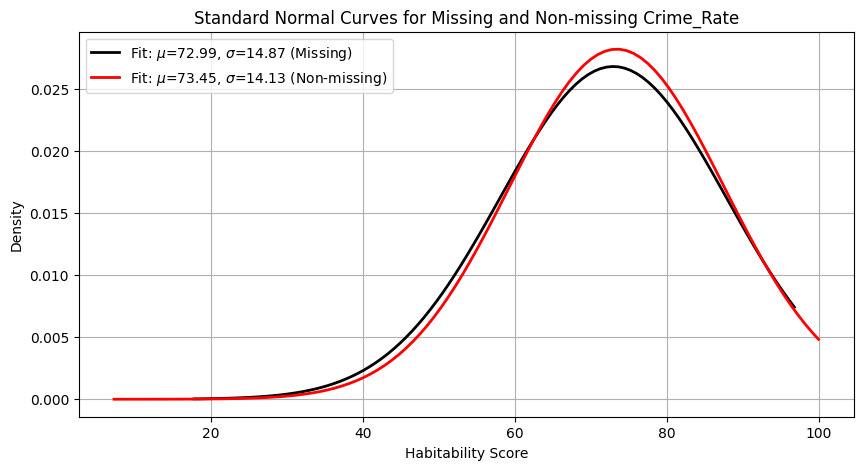

In [157]:
# Extract data for missing and non-missing values of Furnishing
missing_values = df[df['Crime_Rate'].isnull()]['Habitability_score']
non_missing_values = df[df['Crime_Rate'].notnull()]['Habitability_score']

# Fit Gaussian distributions to the data
mu_missing, std_missing = norm.fit(missing_values)
mu_non_missing, std_non_missing = norm.fit(non_missing_values)

# Plot standard normal curves
plt.figure(figsize=(10, 5))

# Plot the standard normal curves for missing values
x = np.linspace(missing_values.min(), missing_values.max(), 100)
p_missing = norm.pdf(x, mu_missing, std_missing)
plt.plot(x, p_missing, 'k', linewidth=2, label=f'Fit: $\mu$={mu_missing:.2f}, $\sigma$={std_missing:.2f} (Missing)')

# Plot the standard normal curves for non-missing values
x = np.linspace(non_missing_values.min(), non_missing_values.max(), 100)
p_non_missing = norm.pdf(x, mu_non_missing, std_non_missing)
plt.plot(x, p_non_missing, 'r', linewidth=2, label=f'Fit: $\mu$={mu_non_missing:.2f}, $\sigma$={std_non_missing:.2f} (Non-missing)')

plt.xlabel('Habitability Score')
plt.ylabel('Density')
plt.title('Standard Normal Curves for Missing and Non-missing Crime_Rate')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
# Separate the dataset into two subsets: one with missing values and the other without
df_missing = df[df['Crime_Rate'].isnull()]
df_non_missing = df.dropna(subset=['Crime_Rate'])

# Split the non-missing subset into features (X) and target variable (y)
X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
y_train = df_non_missing['Crime_Rate']

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Find the k-nearest neighbors for each missing value
X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# Predict the missing values using mode of the nearest neighbors
predicted_values = []
for neighbors in nearest_neighbors:
    mode_value, _ = mode(y_train.iloc[neighbors])
    if not np.isnan(mode_value):  # Check if mode_value is not NaN
        predicted_values.append(mode_value)
    else:
        # Handle case where mode is NaN (e.g., all neighbors have different values)
        # You can implement custom logic here, such as selecting a random value
        predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# Fill in the missing values in the original DataFrame
df.loc[df['Crime_Rate'].isnull(), 'Crime_Rate'] = predicted_values





# # Separate the dataset into two subsets: one with missing values and the other without
# df_missing = test_df[test_df['Crime_Rate'].isnull()]
# df_non_missing = test_df.dropna(subset=['Crime_Rate'])

# # Split the non-missing subset into features (X) and target variable (y)
# X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# y_train = df_non_missing['Crime_Rate']

# # Train a KNN model
# knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
# knn_model.fit(X_train, y_train)

# # Find the k-nearest neighbors for each missing value
# X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# # Predict the missing values using mode of the nearest neighbors
# predicted_values = []
# for neighbors in nearest_neighbors:
#     mode_value, _ = mode(y_train.iloc[neighbors])
#     if not np.isnan(mode_value):  # Check if mode_value is not NaN
#         predicted_values.append(mode_value)
#     else:
#         # Handle case where mode is NaN (e.g., all neighbors have different values)
#         # You can implement custom logic here, such as selecting a random value
#         predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# # Fill in the missing values in the original DataFrame
# df.loc[df['Crime_Rate'].isnull(), 'Crime_Rate'] = predicted_values

In [159]:
display(df['Crime_Rate'].value_counts())

Crime_Rate
0.0    15954
1.0     9476
2.0     4265
3.0     1904
Name: count, dtype: int64

In [160]:
display(df['Dust_and_Noise'].value_counts())
df['Dust_and_Noise'] = df['Dust_and_Noise'].map({'Low': 0, 'Medium': 1, 'High': 2})
# test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].map({'Low': 0, 'Medium': 1, 'High': 2})

Dust_and_Noise
Medium    26376
High       2572
Low        1652
Name: count, dtype: int64

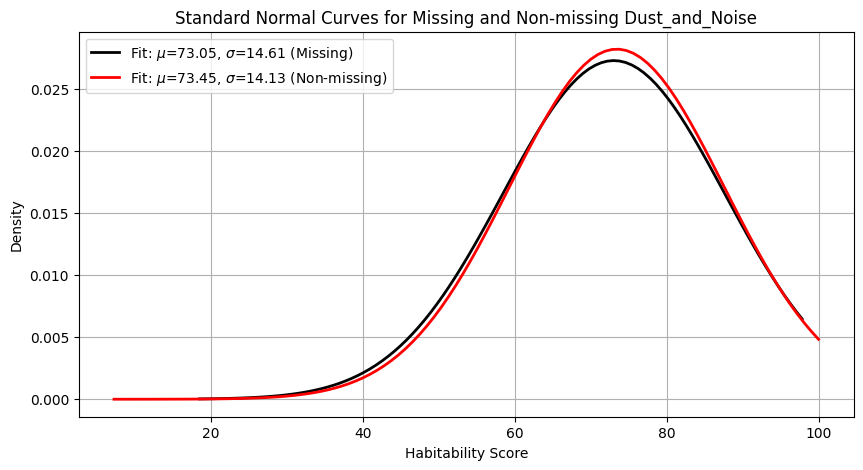

In [161]:
# Extract data for missing and non-missing values of Furnishing
missing_values = df[df['Dust_and_Noise'].isnull()]['Habitability_score']
non_missing_values = df[df['Dust_and_Noise'].notnull()]['Habitability_score']

# Fit Gaussian distributions to the data
mu_missing, std_missing = norm.fit(missing_values)
mu_non_missing, std_non_missing = norm.fit(non_missing_values)

# Plot standard normal curves
plt.figure(figsize=(10, 5))

# Plot the standard normal curves for missing values
x = np.linspace(missing_values.min(), missing_values.max(), 100)
p_missing = norm.pdf(x, mu_missing, std_missing)
plt.plot(x, p_missing, 'k', linewidth=2, label=f'Fit: $\mu$={mu_missing:.2f}, $\sigma$={std_missing:.2f} (Missing)')

# Plot the standard normal curves for non-missing values
x = np.linspace(non_missing_values.min(), non_missing_values.max(), 100)
p_non_missing = norm.pdf(x, mu_non_missing, std_non_missing)
plt.plot(x, p_non_missing, 'r', linewidth=2, label=f'Fit: $\mu$={mu_non_missing:.2f}, $\sigma$={std_non_missing:.2f} (Non-missing)')

plt.xlabel('Habitability Score')
plt.ylabel('Density')
plt.title('Standard Normal Curves for Missing and Non-missing Dust_and_Noise')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
# Separate the dataset into two subsets: one with missing values and the other without
df_missing = df[df['Dust_and_Noise'].isnull()]
df_non_missing = df.dropna(subset=['Dust_and_Noise'])

# Split the non-missing subset into features (X) and target variable (y)
X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
y_train = df_non_missing['Dust_and_Noise']

# Train a KNN model
knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Find the k-nearest neighbors for each missing value
X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# Predict the missing values using mode of the nearest neighbors
predicted_values = []
for neighbors in nearest_neighbors:
    mode_value, _ = mode(y_train.iloc[neighbors])
    if not np.isnan(mode_value):  # Check if mode_value is not NaN
        predicted_values.append(mode_value)
    else:
        # Handle case where mode is NaN (e.g., all neighbors have different values)
        # You can implement custom logic here, such as selecting a random value
        predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# Fill in the missing values in the original DataFrame
df.loc[df['Dust_and_Noise'].isnull(), 'Dust_and_Noise'] = predicted_values





# # Separate the dataset into two subsets: one with missing values and the other without
# df_missing = test_df[test_df['Dust_and_Noise'].isnull()]
# df_non_missing = test_df.dropna(subset=['Dust_and_Noise'])

# # Split the non-missing subset into features (X) and target variable (y)
# X_train = df_non_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# y_train = df_non_missing['Dust_and_Noise']

# # Train a KNN model
# knn_model = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed
# knn_model.fit(X_train, y_train)

# # Find the k-nearest neighbors for each missing value
# X_missing = df_missing[['Habitability_score']]  # Using only 'Habitability_score' as a feature
# nearest_neighbors = knn_model.kneighbors(X_missing, n_neighbors=5, return_distance=False)

# # Predict the missing values using mode of the nearest neighbors
# predicted_values = []
# for neighbors in nearest_neighbors:
#     mode_value, _ = mode(y_train.iloc[neighbors])
#     if not np.isnan(mode_value):  # Check if mode_value is not NaN
#         predicted_values.append(mode_value)
#     else:
#         # Handle case where mode is NaN (e.g., all neighbors have different values)
#         # You can implement custom logic here, such as selecting a random value
#         predicted_values.append(y_train.iloc[neighbors[0]])  # Select the first neighbor's value as a fallback

# # Fill in the missing values in the original DataFrame
# df.loc[df['Dust_and_Noise'].isnull(), 'Dust_and_Noise'] = predicted_values

In [163]:
display(df['Dust_and_Noise'].value_counts())

Dust_and_Noise
1.0    27354
2.0     2583
0.0     1662
Name: count, dtype: int64

In [164]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['Property_Type', 'Power_Backup', 'Water_Supply']

# Encode each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Check the encoded DataFrame
print(df.head())





# # Encode each column
# for column in columns_to_encode:
#     test_df[column] = label_encoder.fit_transform(test_df[column])

       Id  Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0  0x21e3              1            106                3.4                1   
1  0x68d4              1            733                2.0                2   
2  0x7d81              1            737                4.0                2   
3  0x7a57              1            900                3.0                2   
4  0x9409              2           2238               14.0                6   

   Furnishing  Frequency_of_Powercuts  Power_Backup  Water_Supply  \
0         1.0                     0.0             1             3   
1         0.0                     1.0             1             2   
2         2.0                     0.0             1             3   
3         0.0                     2.0             2             3   
4         2.0                     0.0             1             0   

   Traffic_Density_Score  Crime_Rate  Dust_and_Noise  Air_Quality_Index  \
0                   5.89         1.

In [165]:
# Drop the 'Id' column
df.drop(columns=['Id'], inplace=True)

# Check the DataFrame after dropping the column
print(df.head())





# # Drop the 'Id' column
# df.drop(columns=['Id'], inplace=True)

   Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0              1            106                3.4                1   
1              1            733                2.0                2   
2              1            737                4.0                2   
3              1            900                3.0                2   
4              2           2238               14.0                6   

   Furnishing  Frequency_of_Powercuts  Power_Backup  Water_Supply  \
0         1.0                     0.0             1             3   
1         0.0                     1.0             1             2   
2         2.0                     0.0             1             3   
3         0.0                     2.0             2             3   
4         2.0                     0.0             1             0   

   Traffic_Density_Score  Crime_Rate  Dust_and_Noise  Air_Quality_Index  \
0                   5.89         1.0             1.0               90.0   
1       

In [166]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns except 'Id' (assuming 'Id' has been dropped)
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Check the scaled DataFrame
print(scaled_df.head())





# # Scale all columns except 'Id' (assuming 'Id' has been dropped)
# scaled_data = scaler.fit_transform(test_df)

# # Convert the scaled data back to a DataFrame
# scaled_df = pd.DataFrame(scaled_data, columns=test_df.columns)

   Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
0            0.2       0.000215           0.226667              0.0   
1            0.2       0.022636           0.133333              0.2   
2            0.2       0.022779           0.266667              0.2   
3            0.2       0.028608           0.200000              0.2   
4            0.4       0.076455           0.933333              1.0   

   Furnishing  Frequency_of_Powercuts  Power_Backup  Water_Supply  \
0         0.5                0.000000           0.5          0.75   
1         0.0                0.333333           0.5          0.50   
2         1.0                0.000000           0.5          0.75   
3         0.0                0.666667           1.0          0.75   
4         1.0                0.000000           0.5          0.00   

   Traffic_Density_Score  Crime_Rate  Dust_and_Noise  Air_Quality_Index  \
0               0.594349    0.333333             0.5           0.086207   
1       

In [167]:
# Split the dataset into features (X) and target variable (habitability score)
X = df.drop(columns=['Habitability_score'])
y = df['Habitability_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict habitability scores for the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 9.168805564230663


In [168]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_y_pred, squared=False)
print("Gradient Boosting RMSE:", gb_rmse)

Random Forest RMSE: 5.763623030432779
Gradient Boosting RMSE: 6.896120052090593
